In [263]:
import pandas as pd
import numpy as np
import requests
import json 
from IPython.display import display
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
# let us load the twitter archive enhanced csv file 
twitter_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
twitter_enhanced.head(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                                                               source  \
0  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
3  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
4  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

   retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
0                  NaN                       NaN                        NaN   
1                  NaN                       NaN                        NaN   
2                  NaN                       NaN                        NaN   
3                  NaN                       NaN                        NaN   
4                  NaN                       NaN                        NaN   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name doggo floofer pupper puppo  
0                13                  10   Phineas  None    None   None  None  
1                13                  10     Tilly  None    None   None  None  
2                12                  10    Archie  None    None   None  None  
3                13                  10     Darla  None    None   None  None  
4                12                  10  Franklin  None    None   None  None

In [265]:
twitter_enhanced.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2001  672482722825261057                    NaN                  NaN   
1642  684097758874210310                    NaN                  NaN   
2254  667782464991965184                    NaN                  NaN   
848   766069199026450432                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   

                      timestamp  \
2001  2015-12-03 18:29:09 +0000   
1642  2016-01-04 19:43:10 +0000   
2254  2015-11-20 19:12:01 +0000   
848   2016-08-18 00:28:24 +0000   
14    2017-07-24 17:02:04 +0000   

                                                                                  source  \
2001  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
1642  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2254  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
848   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
14    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                text  \
2001                                      This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt   
1642                                                      Say hello to Lupe. This is how she sleeps. 10/10 impressive really https://t.co/Fz6iZWlk8C   
2254          Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10 https://t.co/BY8nQAMz0x   
848                                                       This is Juno. She can see your future. 12/10 h*ckin mesmerizing af https://t.co/Z69mShifuk   
14    This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq   

      retweeted_status_id  retweeted_status_user_id  \
2001                  NaN                       NaN   
1642                  NaN                       NaN   
2254                  NaN                       NaN   
848                   NaN                       NaN   
14                    NaN                       NaN   

     retweeted_status_timestamp  \
2001                        NaN   
1642                        NaN   
2254                        NaN   
848                         NaN   
14                          NaN   

                                                        expanded_urls  \
2001  https://twitter.com/dog_rates/status/672482722825261057/photo/1   
1642  https://twitter.com/dog_rates/status/684097758874210310/photo/1   
2254  https://twitter.com/dog_rates/status/667782464991965184/photo/1   
848   https://twitter.com/dog_rates/status/766069199026450432/photo/1   
14    https://twitter.com/dog_rates/status/889531135344209921/photo/1   

      rating_numerator  rating_denominator    name doggo floofer pupper  puppo  
2001                10                  10   light  None    None   None   None  
1642                10                  10    Lupe  None    None   None   None  
2254                 9                  10    None  None    None   None   None  
848                 12                  10    Juno  None    None   None   None  
14                  13                  10  Stuart  None    None   None  puppo

###  Visual inspection :
#### There are some tidness issues 
   a) there are four columns for one variable which is dog breed 
#### There are some quality issues 
   a) there are some Nans values
   <br>
   b) there timestamp shall be of date type , we shall correct that for e.g by using parsetimes
   <br>
   

In [266]:
twitter_enhanced['text'][1635]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [267]:
twitter_enhanced['text'][2111]

"Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp"

#### As it is shown above , the extracted dog name from the text source understands different paragraph beginning formats such as : Meet Koda or this is koda 
#### But As all the texts don't have the same structure so there may be doubts that the extracted name column algorithm didn't cover all possible paragraph beginnings 
#### To make sure of this let us take a sample for the dog name column that holds Nan Values
####  Let us mark this as the fourth quality issue. 


In [268]:
check_df1=twitter_enhanced[twitter_enhanced['name']=='None'] # sorting null values dogs names 

In [269]:
check_df1.text.head(15)[35] # I made alot of tries till I get this one , Here we notice that the dog name is howard , however as the format of the text doesn't match the 'name' column extraction algorithm . the name column is 'null' 

'I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk'

In [270]:
twitter_enhanced.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Strider      1
Blanket      1
Durg         1
Monty        1
Dot          1
Name: name, Length: 957, dtype: int64

#### the fifth quality issue is that some dogs names hold Nan Value while in the text there is a dog name .Also there are dog names with value :  a. 

In [271]:
#Let us check if there are two breeds for the same dog 
twitter_enhanced[(twitter_enhanced.pupper=='pupper') & (twitter_enhanced.floofer!='None')]
twitter_enhanced[(twitter_enhanced.doggo=='doggo') & (twitter_enhanced.floofer!='None')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
200  854010172552949760                    NaN                  NaN   

                     timestamp  \
200  2017-04-17 16:34:26 +0000   

                                                                                 source  \
200  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                     text  \
200  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
200                  NaN                       NaN                        NaN   

                                                                                                                       expanded_urls  \
200  https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1   

     rating_numerator  rating_denominator  name  doggo  floofer pupper puppo  
200                11                  10  None  doggo  floofer   None  None

### we have caught the sixth quality issue , there is another quality issue : two dog stages are there for one dog 

In [272]:

pd.set_option('display.max_colwidth', None)
twitter_enhanced.iloc[[200]]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
200  854010172552949760                    NaN                  NaN   

                     timestamp  \
200  2017-04-17 16:34:26 +0000   

                                                                                 source  \
200  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                                                     text  \
200  At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk   

     retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp  \
200                  NaN                       NaN                        NaN   

                                                                                                                       expanded_urls  \
200  https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1   

     rating_numerator  rating_denominator  name  doggo  floofer pupper puppo  
200                11                  10  None  doggo  floofer   None  None

### It is clear that the problem there that the breed algorithm for example when filling the floofer column , it looks for the dogoo in the text and then fills it That is the problem when having four columns for one variable 
###  Let us check the another file which is the image prediction.tsv 

In [273]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [274]:
image_predictions_csv=pd.read_csv('image-predictions.tsv',sep="\t")

In [275]:
image_predictions_csv.head(10)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5  666050758794694657  https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6  666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7  666055525042405380  https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8  666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9  666058600524156928  https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   
5        1    Bernese_mountain_dog  0.651137    True    English_springer   
6        1              box_turtle  0.933012   False          mud_turtle   
7        1                    chow  0.692517    True     Tibetan_mastiff   
8        1           shopping_cart  0.962465   False     shopping_basket   
9        1        miniature_poodle  0.201493    True            komondor   

    p2_conf  p2_dog                           p3   p3_conf  p3_dog  
0  0.156665    True            Shetland_sheepdog  0.061428    True  
1  0.074192    True          Rhodesian_ridgeback  0.072010    True  
2  0.138584    True                   bloodhound  0.116197    True  
3  0.360687    True           miniature_pinscher  0.222752    True  
4  0.243682    True                     Doberman  0.154629    True  
5  0.263788    True   Greater_Swiss_Mountain_dog  0.016199    True  
6  0.045885   False                     terrapin  0.017885   False  
7  0.058279    True                     fur_coat  0.054449   False  
8  0.014594   False             golden_retriever  0.007959    True  
9  0.192305    True  soft-coated_wheaten_terrier  0.082086    True

In [276]:
#it seems that some of the photos don't belong to a dog breed 
#let us check if P1_dog is false 
len(image_predictions_csv[image_predictions_csv['p1_dog']==False])


543

In [277]:
#it seems above that there are 543 False predictions.it is either a problem in the predicting algorithm or the url directs to a false photo 
#let us check for a sample 
import urllib.request



In [278]:
#It is clear that the higher confidence level which is P1 may not be correct however it was confident 0.9 ! as in that case P3 confidene level is the correct one. 
# For better check let us create a dataframe with only false value in P1_dog &P2_dog & P3_dog
False_images=image_predictions_csv[(image_predictions_csv["p1_dog"]==False) & (image_predictions_csv["p2_dog"]==False) & ( image_predictions_csv["p3_dog"]==False)]
False_images.head()
False_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  324 non-null    int64  
 1   jpg_url   324 non-null    object 
 2   img_num   324 non-null    int64  
 3   p1        324 non-null    object 
 4   p1_conf   324 non-null    float64
 5   p1_dog    324 non-null    bool   
 6   p2        324 non-null    object 
 7   p2_conf   324 non-null    float64
 8   p2_dog    324 non-null    bool   
 9   p3        324 non-null    object 
 10  p3_conf   324 non-null    float64
 11  p3_dog    324 non-null    bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


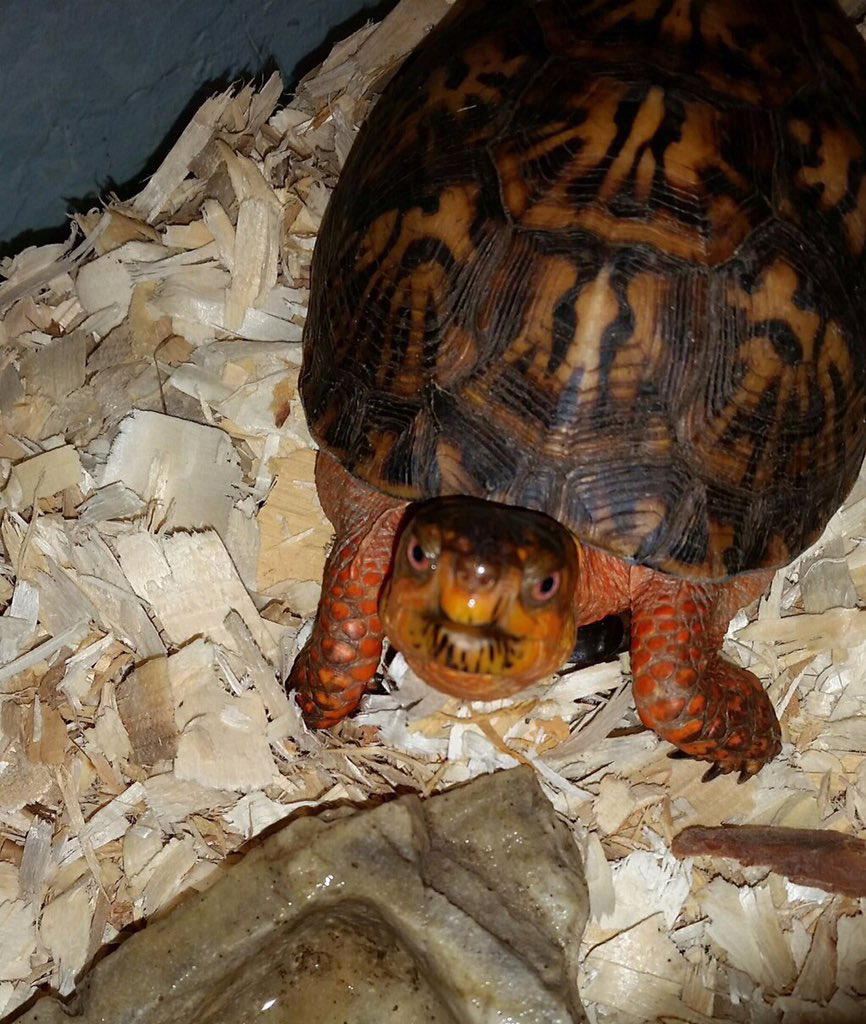

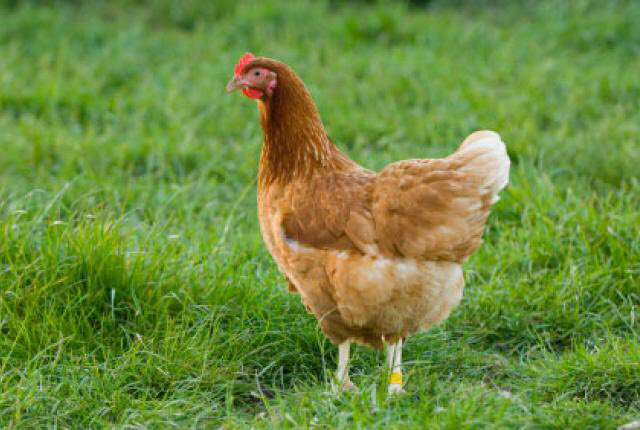

In [279]:
#Let us check for this one , we may show the first two indices 
url1=image_predictions_csv['jpg_url'][6]
url2=image_predictions_csv['jpg_url'][17]
urllib.request.urlretrieve(url1,"dog1.jpg")
display(Image.open("dog1.jpg"))
urllib.request.urlretrieve(url2,"dog2.jpg")
display(Image.open("dog2.jpg"))

#### this is the 7th Quality issue : there are 324 false dogs images.



In [280]:

#lets get back to the twitter_enhanced.csv and check for the numerator/den. value counts
twitter_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

### 8th quality issue > There are some outliers : I suggest remove those outliers as they are very extreme and  will effect our plotting. . 
### We can remove values less than 2 and greater than 15

In [281]:
#There are some outliers like :960,1776,1,2,0 .. those outliers will effect our plotting.
#I suggest to remove those outliers in case of plotting. 
# I will load the JSON File now and convert it to dataframe 
df_Json_list = []
with open('tweet-json') as file:
    for line in file:
        tweet = json.loads(line)
        
        df_Json_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'likes_count': tweet['favorite_count']
        })
df_Json = pd.DataFrame(df_Json_list, columns = ['tweet_id', 'retweet_count', 'likes_count'])
       
df_Json.head()


tweet_id  retweet_count  likes_count
0  892420643555336193           8853        39467
1  892177421306343426           6514        33819
2  891815181378084864           4328        25461
3  891689557279858688           8964        42908
4  891327558926688256           9774        41048

In [282]:
df_Json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   likes_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


####  we shall remove the retweets. 

In [283]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [284]:
# We would like to compare the tweet IDs in both files : 
#A one simple way is to merge both DF by tweer id 
combined_list = pd.merge(df_Json,twitter_enhanced,how='left',on='tweet_id')

In [285]:
combined_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   retweet_count               2354 non-null   int64  
 2   likes_count                 2354 non-null   int64  
 3   in_reply_to_status_id       78 non-null     float64
 4   in_reply_to_user_id         78 non-null     float64
 5   timestamp                   2354 non-null   object 
 6   source                      2354 non-null   object 
 7   text                        2354 non-null   object 
 8   retweeted_status_id         179 non-null    float64
 9   retweeted_status_user_id    179 non-null    float64
 10  retweeted_status_timestamp  179 non-null    object 
 11  expanded_urls               2295 non-null   object 
 12  rating_numerator            2354 non-null   int64  
 13  rating_denominator          2354 

In [286]:
# As we see here ;there are 2354 tweet IDs in the combined list
# so there are two tweet ids ,most probable they are duplicated or retweets 
# let us check 
twitter_enhanced[twitter_enhanced['tweet_id'].duplicated()]#search for duplicated tags 

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### let us search for the  retweets

In [287]:
twitter_enhanced[twitter_enhanced.text.str.match('^RT @')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    181 non-null    int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   181 non-null    object 
 4   source                      181 non-null    object 
 5   text                        181 non-null    object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               180 non-null    object 
 10  rating_numerator            181 non-null    int64  
 11  rating_denominator          181 non-null    int64  
 12  name                        181 non-null    object 
 13  doggo                       181 n

#### That is the ninth quality issue : some are retweets we shall drop them 

#  The Quality issues are :
## Twitter_enhanced_csv

1)the timestamp shall be of date type , we shall correct that for e.g by using parsetimes
<br>
2)some dog names are : a 
<br>
3)some dog names hold Nan Values while the text included the dog names
<br>
4) Two dog stages are there for one dog.
<br>
5) outliers in dog rating numerators  like 1776 , O ..etc.
<br>
6) there are retweets . we shall drop them . 
<br>

## Image_prediction 

7) 324 false images that don't contain dog names
<br>
8) Downsize P1,P2,P3 predictions

# The tidness issues are : 

1)merge the three dataframes into one dataframe
<br>
2)drop unneeded columns 


# first we want to make a copy 

In [288]:
twitter_enhanced_clean=twitter_enhanced.copy()
image_predictions_csv_clean=image_predictions_csv.copy()
df_Json_clean=df_Json.copy()

# Twitter_enhanced :

## 1) merge dog stages in one column 
## 2) drop unwanted columns

In [289]:
# 1) let us combine the dog breeds in one column 
twitter_enhanced_clean['dog_stage']='None'
for row in range(len(twitter_enhanced_clean.index)):
    dog_stage=[]
    if(twitter_enhanced_clean.doggo.loc[row]=='doggo'):
        dog_stage.append('doggo')
    if(twitter_enhanced_clean.floofer.loc[row]=='floofer'):
        dog_stage.append('floofer')
    if(twitter_enhanced_clean.puppo.loc[row]=='puppo'):
        dog_stage.append('puppo')
    if(twitter_enhanced_clean.pupper.loc[row]=='pupper'):
        dog_stage.append('pupper')
    if(dog_stage!=[]):
        twitter_enhanced_clean.dog_stage.loc[row]=','.join(dog_stage)
    elif(dog_stage==[]):
        twitter_enhanced_clean.dog_stage.loc[row]='None'

twitter_enhanced_clean=twitter_enhanced_clean.drop(['floofer','pupper','puppo','doggo','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)        


C:\Users\mohannad.ayman\New folder (3)\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [290]:
twitter_enhanced_clean.info() #test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2356 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2356 non-null   object 
 4   source                 2356 non-null   object 
 5   text                   2356 non-null   object 
 6   expanded_urls          2297 non-null   object 
 7   rating_numerator       2356 non-null   int64  
 8   rating_denominator     2356 non-null   int64  
 9   name                   2356 non-null   object 
 10  dog_stage              2356 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 202.6+ KB


In [291]:
twitter_enhanced_clean.dog_stage.value_counts() #test

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

# twitter_enhanced 

## 3) Name is sometimes : a

In [292]:
# let us see filter by name = 'a'
twitter_enhanced_clean[twitter_enhanced_clean.name=='a']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
56    881536004380872706                    NaN                  NaN   
649   792913359805018113                    NaN                  NaN   
801   772581559778025472                    NaN                  NaN   
1002  747885874273214464                    NaN                  NaN   
1004  747816857231626240                    NaN                  NaN   
1017  746872823977771008                    NaN                  NaN   
1049  743222593470234624                    NaN                  NaN   
1193  717537687239008257                    NaN                  NaN   
1207  715733265223708672                    NaN                  NaN   
1340  704859558691414016                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1361  703079050210877440                    NaN                  NaN   
1368  702539513671897089                    NaN                  NaN   
1382  700864154249383937                    NaN                  NaN   
1499  692187005137076224                    NaN                  NaN   
1737  679530280114372609                    NaN                  NaN   
1785  677644091929329666                    NaN                  NaN   
1853  675706639471788032                    NaN                  NaN   
1854  675534494439489536                    NaN                  NaN   
1877  675109292475830276                    NaN                  NaN   
1878  675047298674663426                    NaN                  NaN   
1923  674082852460433408                    NaN                  NaN   
1941  673715861853720576                    NaN                  NaN   
1955  673636718965334016                    NaN                  NaN   
1994  672604026190569472                    NaN                  NaN   
2034  671743150407421952                    NaN                  NaN   
2066  671147085991960577                    NaN                  NaN   
2116  670427002554466305                    NaN                  NaN   
2125  670361874861563904                    NaN                  NaN   
2128  670303360680108032                    NaN                  NaN   
2146  669923323644657664                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2161  669564461267722241                    NaN                  NaN   
2191  668955713004314625                    NaN                  NaN   
2198  668815180734689280                    NaN                  NaN   
2211  668614819948453888                    NaN                  NaN   
2218  668507509523615744                    NaN                  NaN   
2222  668466899341221888                    NaN                  NaN   
2235  668171859951755264                    NaN                  NaN   
2249  667861340749471744                    NaN                  NaN   
2255  667773195014021121                    NaN                  NaN   
2264  667538891197542400                    NaN                  NaN   
2273  667470559035432960                    NaN                  NaN   
2287  667177989038297088                    NaN                  NaN   
2304  666983947667116034                    NaN                  NaN   
2311  666781792255496192                    NaN                  NaN   
2314  666701168228331520                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2350  666050758794694657                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN         

In [293]:

# By visual inspection it seems that the problem rises because the algorithm checks for what is after "this is "
#however in some tweets the dog name doesn't show immediately after "this is " , so let us solve this problem 

for row in range(len(twitter_enhanced_clean.index)):
    
    if twitter_enhanced_clean.name.loc[row] == 'a':
        
        #get the text from each row
        text = twitter_enhanced_clean.text.loc[row]
        text_split=text.split()
        name='None' 
        # get the dog  name from named
        if 'named' in text:
            name_position = text_split.index('named') + 1 
            name = text_split[name_position]
        # get the dog name from (name is)
        elif 'name is' in text:
            name_position = text_split.index('name') + 2 # skip "is" and go to the index afterwards 
            name = text_split[name_position]
        twitter_enhanced_clean.name.loc[row] = name

C:\Users\mohannad.ayman\New folder (3)\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [294]:
'a' in twitter_enhanced_clean.name #TEST

False

In [295]:
twitter_enhanced_clean.name.value_counts() #TEST 

None       780
Charlie     12
Oliver      11
Lucy        11
Cooper      11
          ... 
Zoe          1
Lupe         1
Kohl.        1
Dwight       1
Dot          1
Name: name, Length: 976, dtype: int64

# Twitter_enhanced 

## 4) drop retweets  ( Tidness issue)


In [296]:
retweet=twitter_enhanced_clean.text.str.match('^RT @')
twitter_enhanced_clean[retweet].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               181 non-null    int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              181 non-null    object 
 4   source                 181 non-null    object 
 5   text                   181 non-null    object 
 6   expanded_urls          180 non-null    object 
 7   rating_numerator       181 non-null    int64  
 8   rating_denominator     181 non-null    int64  
 9   name                   181 non-null    object 
 10  dog_stage              181 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 17.0+ KB


In [297]:
twitter_enhnced_clean=twitter_enhanced_clean.drop(twitter_enhanced_clean[retweet].index,axis=0,inplace=True)
twitter_enhanced_clean[retweet]#Test

<ipython-input-297-5c08afc12d5b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twitter_enhanced_clean[retweet]#Test


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage]
Index: []

In [298]:
twitter_enhanced_clean.info()#Test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_stage              2175 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


# Twitter_enhanced 
## 5) make a one column that holds that rating 

In [299]:
twitter_enhanced_clean.rating_denominator.describe()

count    2175.000000
mean       10.492874
std         7.019084
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [300]:
#most of den equals to 10 , so we shall remove un logical rating_den 
twitter_enhanced_clean=twitter_enhanced_clean.loc[(twitter_enhanced_clean['rating_denominator'] == 10)]
twitter_enhanced_clean['rating_denominator'].value_counts() #Test

10    2153
Name: rating_denominator, dtype: int64

In [301]:
twitter_enhanced_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [302]:
# I will remove the outliers above 14 
twitter_enhanced_clean=twitter_enhanced_clean.loc[(twitter_enhanced_clean['rating_numerator'] < 15)]
twitter_enhanced_clean['rating_numerator'].value_counts() #Test

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

In [303]:
# let us make a one column called rating
twitter_enhanced_clean['rating_percentage']=10 * twitter_enhanced_clean['rating_numerator'] # divide by 10 then multiply by 100
#let us drop the unecessary columns 
twitter_enhanced_clean=twitter_enhanced_clean.drop(['rating_numerator','rating_denominator'],axis=1)        
twitter_enhanced_clean.info() #test
twitter_enhanced_clean.rating_percentage.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2143 non-null   int64  
 1   in_reply_to_status_id  68 non-null     float64
 2   in_reply_to_user_id    68 non-null     float64
 3   timestamp              2143 non-null   object 
 4   source                 2143 non-null   object 
 5   text                   2143 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   name                   2143 non-null   object 
 8   dog_stage              2143 non-null   object 
 9   rating_percentage      2143 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 184.2+ KB


120    500
100    442
110    425
130    307
90     155
80      98
70      53
140     43
50      36
60      32
30      19
40      15
20       9
10       7
0        2
Name: rating_percentage, dtype: int64

# Twitter_enhanced

## 6) convert timestap and retweeted_status_timestamp to date type 



In [304]:

twitter_enhanced_clean['timestamp']=pd.to_datetime(twitter_enhanced_clean['timestamp'])

In [305]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2143 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              2143 non-null   datetime64[ns, UTC]
 4   source                 2143 non-null   object             
 5   text                   2143 non-null   object             
 6   expanded_urls          2094 non-null   object             
 7   name                   2143 non-null   object             
 8   dog_stage              2143 non-null   object             
 9   rating_percentage      2143 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 184.2+ KB


# df_Json 

## 7) remove retweet counts

In [306]:
#let us check the df_json list 
df_Json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2354 non-null   int64
 1   retweet_count  2354 non-null   int64
 2   likes_count    2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [307]:
#the retweet count is not needed , we only need the likes count 
df_Json_clean=df_Json.drop(['retweet_count'],axis=1)

In [308]:
df_Json_clean.info() # test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   tweet_id     2354 non-null   int64
 1   likes_count  2354 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


# image_predictions 

## 8)  let us remove the tweets with false dog images

In [309]:
False_images=(image_predictions_csv_clean["p1_dog"]==False) & (image_predictions_csv_clean["p2_dog"]==False) & ( image_predictions_csv_clean["p3_dog"]==False)

In [310]:
False_images

0       False
1       False
2       False
3       False
4       False
        ...  
2070    False
2071    False
2072    False
2073    False
2074     True
Length: 2075, dtype: bool

In [311]:
image_predictions_csv_clean.drop(image_predictions_csv_clean[False_images].index,axis=0,inplace=True)

In [312]:
image_predictions_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


# Image predictions 

## 9) Downsize P1,P2,P3 


In [313]:
image_predictions_csv_clean['p1']=image_predictions_csv_clean.p1.str.lower()
image_predictions_csv_clean['p2']=image_predictions_csv_clean.p3.str.lower()
image_predictions_csv_clean['p3']=image_predictions_csv_clean.p3.str.lower()

In [314]:
image_predictions_csv_clean.p2#test

0                 shetland_sheepdog
1               rhodesian_ridgeback
2                        bloodhound
3                miniature_pinscher
4                          doberman
                   ...             
2069                indian_elephant
2070    german_short-haired_pointer
2071                        spatula
2072                         kelpie
2073                       papillon
Name: p2, Length: 1751, dtype: object

# Tidness issue 

## 10) Merge the three data frames in one dataframe and drop any uneeded columns.

In [315]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2143 non-null   int64              
 1   in_reply_to_status_id  68 non-null     float64            
 2   in_reply_to_user_id    68 non-null     float64            
 3   timestamp              2143 non-null   datetime64[ns, UTC]
 4   source                 2143 non-null   object             
 5   text                   2143 non-null   object             
 6   expanded_urls          2094 non-null   object             
 7   name                   2143 non-null   object             
 8   dog_stage              2143 non-null   object             
 9   rating_percentage      2143 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 184.2+ KB


In [316]:
twitter_enhanced_clean=twitter_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1) # drop unwanted columns.

In [317]:
twitter_enhanced_clean.to_csv('twitter_enhanced_clean.csv')#Save as CSV 

In [318]:
df_Json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   tweet_id     2354 non-null   int64
 1   likes_count  2354 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


In [319]:
df_Json_clean.to_csv('df_Json_clean.csv') # Save as CSV

In [320]:
image_predictions_csv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


In [321]:
image_predictions_csv_clean.to_csv('image_predictions_csv_clean.csv')

In [322]:
df_clean=pd.merge(twitter_enhanced_clean,df_Json_clean,how='left',on='tweet_id')
df_clean=pd.merge(df_clean,image_predictions_csv_clean,how='left',on='tweet_id')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2143 non-null   int64              
 1   timestamp          2143 non-null   datetime64[ns, UTC]
 2   source             2143 non-null   object             
 3   text               2143 non-null   object             
 4   expanded_urls      2094 non-null   object             
 5   name               2143 non-null   object             
 6   dog_stage          2143 non-null   object             
 7   rating_percentage  2143 non-null   int64              
 8   likes_count        2143 non-null   int64              
 9   jpg_url            1666 non-null   object             
 10  img_num            1666 non-null   float64            
 11  p1                 1666 non-null   object             
 12  p1_conf            1666 non-null   float64      

In [323]:
df_clean.to_csv('df_twitter_archive_master.csv')

# Section two 
## Visual and insights 

In [324]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2142
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   tweet_id           2143 non-null   int64              
 1   timestamp          2143 non-null   datetime64[ns, UTC]
 2   source             2143 non-null   object             
 3   text               2143 non-null   object             
 4   expanded_urls      2094 non-null   object             
 5   name               2143 non-null   object             
 6   dog_stage          2143 non-null   object             
 7   rating_percentage  2143 non-null   int64              
 8   likes_count        2143 non-null   int64              
 9   jpg_url            1666 non-null   object             
 10  img_num            1666 non-null   float64            
 11  p1                 1666 non-null   object             
 12  p1_conf            1666 non-null   float64      

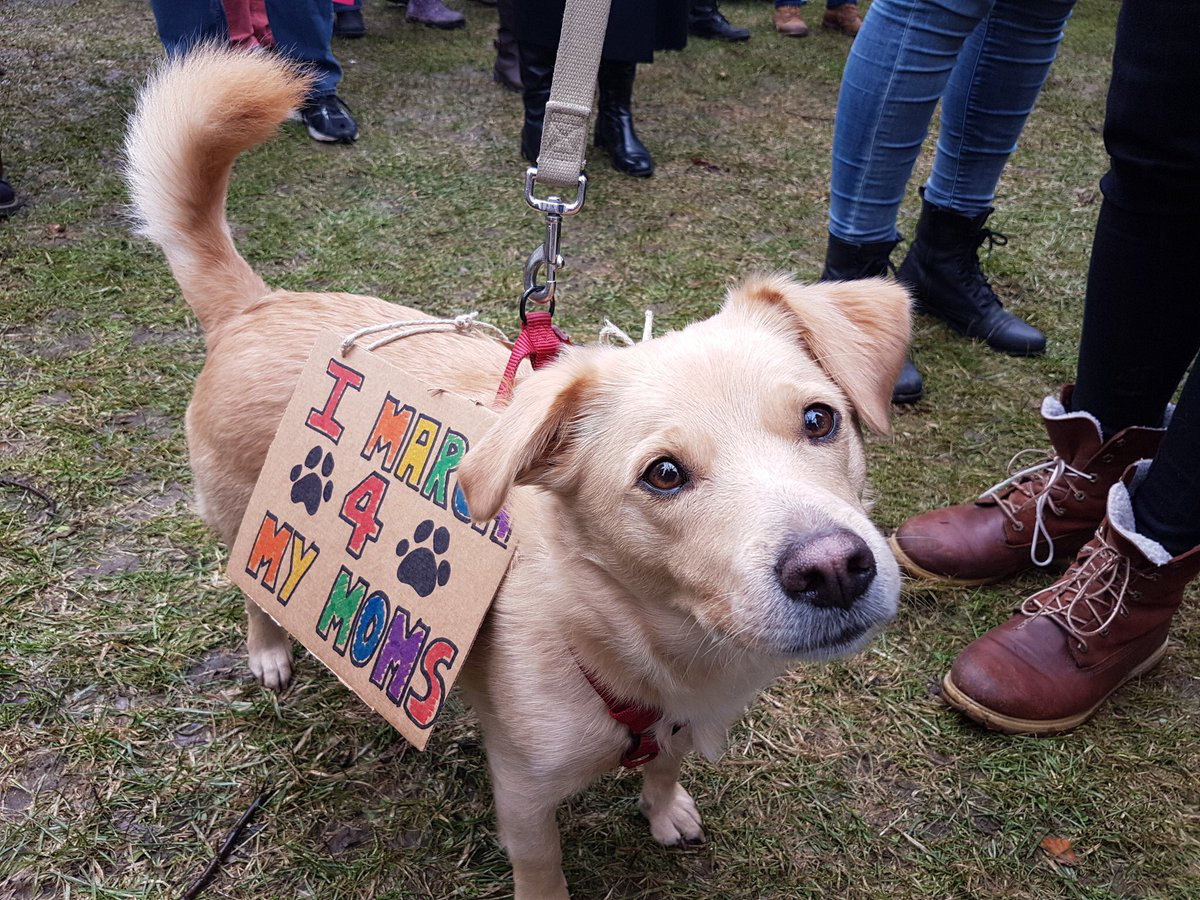

In [325]:
#let us see the dog with the highest likes count 
url_high_like=df_clean[df_clean.likes_count==df_clean.likes_count.max()]['jpg_url']
url_high_like=url_high_like.to_string(header=False,index=False) # remove index and headers to use it as a string to download the image
urllib.request.urlretrieve(url_high_like,"doggie.jpg")
display(Image.open("doggie.jpg"))

## No doubt that this cute dog deserves to get the most likes ! :) for sure his moms like him 

In [326]:
# As mentioned above there are tweets that don't belong to dogs which I filtered them thanks to the image filtration file 
# I would like to take a look about the likes count of those tweets 
df_clean[df_clean['img_num'].isnull()]['likes_count'].describe()

count      477.000000
mean      7181.205451
std       9925.897773
min         52.000000
25%       1520.000000
50%       3131.000000
75%       8319.000000
max      74423.000000
Name: likes_count, dtype: float64

## I didn't expect having those numbers , I thought just few people will like false dog images , may be some of them were hilarious 
## let us show a sample 

In [327]:
df_clean[df_clean['img_num'].isnull()]['text'].sample()

1011    This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10  https://t.co/wJX74TSgzP
Name: text, dtype: object

## Let us take a look on dog stages

In [328]:
df_clean[['rating_percentage' ,'likes_count']].describe() # remember that we reomved the outliers 

rating_percentage    likes_count
count        2143.000000    2143.000000
mean          106.168922    8799.383108
std            21.939638   12110.482522
min             0.000000      52.000000
25%           100.000000    1918.500000
50%           110.000000    4077.000000
75%           120.000000   11205.000000
max           140.000000  132810.000000

In [329]:
# let us plot the ratings distributions 

Text(0.5, 1.0, 'Ratings percentages distribution')

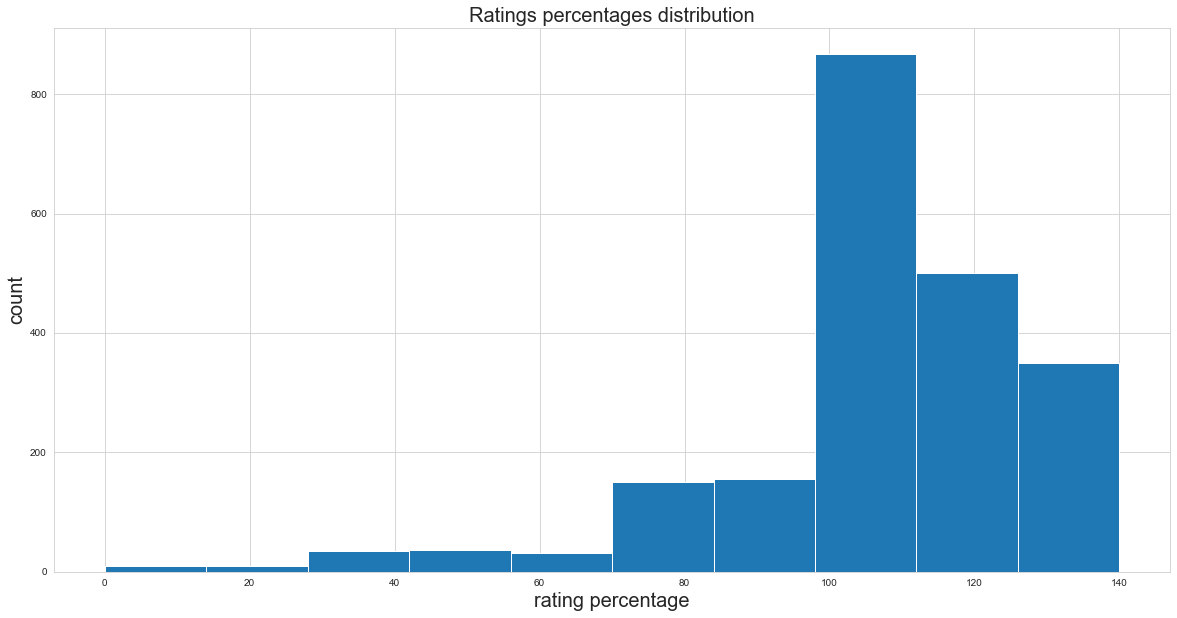

In [330]:
sns.set_style("whitegrid")    
df_clean.rating_percentage.plot(kind='hist',figsize=(20,10),fontsize=10)
plt.xlabel("rating percentage",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.title("Ratings percentages distribution",fontsize=20)

In [337]:
df_clean.dog_stage.value_counts()

None             1800
pupper            223
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [342]:
df_clean_dogstage=df_clean.copy()
#elimnate none dog stages 
df_clean_dogstage.drop(df_clean_dogstage[df_clean_dogstage.dog_stage.str.match('^None')].index,axis=0,inplace=True)
df_clean_dogstage.dog_stage.value_counts()#Test

pupper           223
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

Text(0, 0.5, 'Avarage like counts')

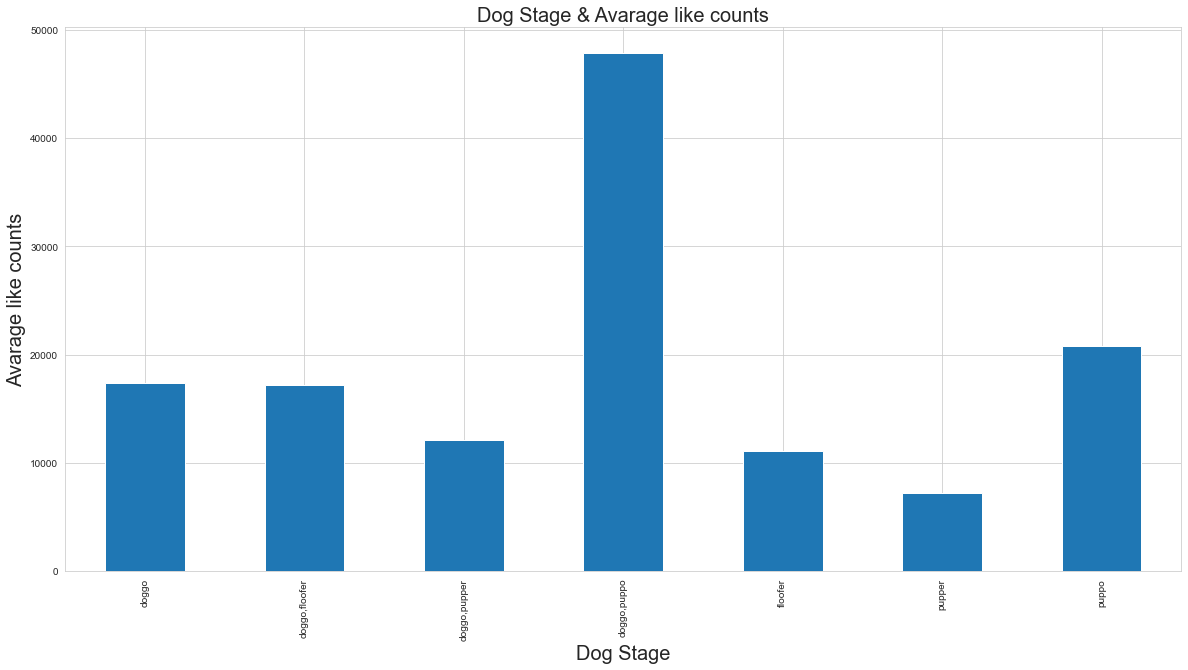

In [345]:

df_clean_dogstage.groupby('dog_stage')['likes_count'].mean().plot(kind='bar',figsize=(20,10))
plt.title('Dog Stage & Avarage like counts', fontsize=20)
plt.xlabel('Dog Stage', fontsize=20)
plt.ylabel('Avarage like counts', fontsize=20)

## This shows us something , that the mean is not always the correct way to visualize as the doggo,puppo dog stage has the highest average mean although it was just one tweet. 

(Note: there is no a dog stage called doggo,puppo. It's just the algorithm found doggo and puppo in the text)